In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('spam.csv', encoding="latin-1")


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df['label'] = df['v1'].map({'ham': 0, 'spam': 1})
df.head()

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


The percentage of Ham class : 0.87
The percentage of Span class : 0.13


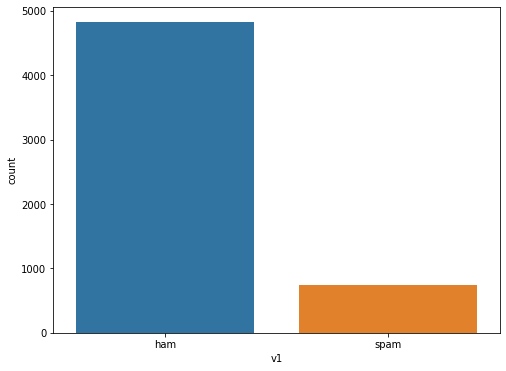

In [7]:
#lookmat the targets percentage
plt.figure(figsize=(8,6))
sns.countplot(df['v1'])

print('The percentage of Ham class : %.2f' % (df['v1'].value_counts()[0] / len(df)))
print('The percentage of Span class : %.2f' % (df['v1'].value_counts()[1] / len(df)))

In [9]:

print(df['v1'].value_counts()[1])


747


# Random Undersampling Technique

In [10]:
df_subsample=df.sample(frac=1)
# amount of spam classes 747 rows.
spam_df=df_subsample.loc[df['v1']=="spam"]
non_spam_df=df_subsample.loc[df['v1']=="ham"][:747]

normal_distributed_df=pd.concat([spam_df,non_spam_df])

# Shuffle dataframe rows
new_df=normal_distributed_df.sample(frac=1,random_state=42)
new_df.head()

,v1,v2,label
1789,ham,Takin a shower now but yeah I'll leave when I'...,0
3081,ham,"And very importantly, all we discuss is betwee...",0
1264,ham,I will see in half an hour,0
3106,ham,Hi. Happy New Year. I dont mean to intrude but...,0
1300,ham,Those cocksuckers. If it makes you feel better...,0


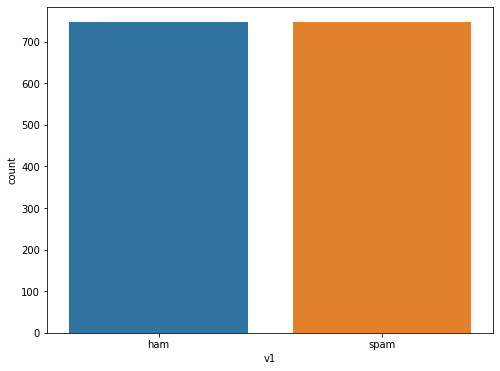

In [11]:
#lookmat the targets percentage
plt.figure(figsize=(8,6))
sns.countplot(new_df['v1'])


In [12]:
X=new_df['v2']
y=new_df['label']

In [13]:
cv=CountVectorizer()
X=cv.fit_transform(X)
print(X)

  (0, 1638)	1
  (0, 4374)	1
  (0, 2497)	1
  (0, 2548)	1
  (0, 4503)	1
  (0, 1187)	1
  (0, 2953)	1
  (0, 3637)	1
  (0, 3927)	1
  (1, 3007)	1
  (1, 1054)	1
  (1, 2338)	1
  (1, 1612)	1
  (1, 4342)	1
  (1, 836)	1
  (1, 2283)	1
  (1, 4250)	1
  (1, 862)	2
  (2, 2217)	1
  (2, 859)	1
  (2, 2105)	1
  (2, 2289)	1
  (2, 3559)	1
  (2, 4398)	1
  (3, 3986)	1
  :	:
  (1493, 727)	1
  (1493, 4488)	1
  (1493, 4041)	1
  (1493, 2508)	1
  (1493, 4536)	1
  (1493, 812)	1
  (1493, 2572)	1
  (1493, 429)	1
  (1493, 2198)	1
  (1493, 4079)	1
  (1493, 2495)	1
  (1493, 3000)	1
  (1493, 2160)	1
  (1493, 2694)	1
  (1493, 2038)	1
  (1493, 941)	2
  (1493, 3999)	1
  (1493, 4549)	1
  (1493, 2990)	1
  (1493, 2046)	1
  (1493, 3992)	1
  (1493, 2814)	1
  (1493, 4055)	1
  (1493, 2338)	1
  (1493, 1187)	1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       241
           1       0.98      0.95      0.97       253

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



In [16]:
 import joblib
joblib.dump(clf, 'NB_spam_model.pkl')

['NB_spam_model.pkl']